In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import date, timedelta

csv_path=os.path.join('..', 'data', 'flow_counts_preprocessed.csv')
df= pd.read_csv(csv_path)

pickle_path=os.path.join('..', 'data', 'flow_counts_preprocessed')
df=pd.read_pickle(pickle_path)

In [2]:
df.head(10)

,location_name,datetime,visitor_count_fw,visitor_count_fw_male,visitor_count_fw_female,visitor_count_bw,visitor_count_bw_male,visitor_count_bw_female,zurich_datetime,smooth_visitor_count_fw,smooth_visitor_count_bw,date,time,time_numeric,cum_sum_visitor_count_fw,cum_sum_visitor_count_bw,num_people_inside,weekday,weekday_num
0,"Zürich, Schlieren",2022-02-28 23:00:00,0,0,0,0,0,0,2022-03-01 00:00:00,0.0,0.0,2022-03-01,00:00:00,0.00,0,0,0,Tuesday,1
1,"Zürich, Schlieren",2022-02-28 23:05:00,0,0,0,0,0,0,2022-03-01 00:05:00,0.0,0.0,2022-03-01,00:05:00,0.08,0,0,0,Tuesday,1
2,"Zürich, Schlieren",2022-02-28 23:10:00,0,0,0,0,0,0,2022-03-01 00:10:00,0.0,0.0,2022-03-01,00:10:00,0.17,0,0,0,Tuesday,1
3,"Zürich, Schlieren",2022-02-28 23:15:00,0,0,0,0,0,0,2022-03-01 00:15:00,0.0,0.0,2022-03-01,00:15:00,0.25,0,0,0,Tuesday,1
4,"Zürich, Schlieren",2022-02-28 23:20:00,0,0,0,0,0,0,2022-03-01 00:20:00,0.0,0.0,2022-03-01,00:20:00,0.33,0,0,0,Tuesday,1
5,"Zürich, Schlieren",2022-02-28 23:25:00,0,0,0,0,0,0,2022-03-01 00:25:00,0.0,0.0,2022-03-01,00:25:00,0.42,0,0,0,Tuesday,1
6,"Zürich, Schlieren",2022-02-28 23:30:00,0,0,0,0,0,0,2022-03-01 00:30:00,0.0,0.0,2022-03-01,00:30:00,0.50,0,0,0,Tuesday,1
7,"Zürich, Schlieren",2022-02-28 23:35:00,0,0,0,0,0,0,2022-03-01 00:35:00,0.0,0.0,2022-03-01,00:35:00,0.58,0,0,0,Tuesday,1
8,"Zürich, Schlieren",2022-02-28 23:40:00,0,0,0,0,0,0,2022-03-01 00:40:00,0.0,0.0,2022-03-01,00:40:00,0.67,0,0,0,Tuesday,1
9,"Zürich, Schlieren",2022-02-28 23:45:00,0,0,0,0,0,0,2022-03-01 00:45:00,0.0,0.0,2022-03-01,00:45:00,0.75,0,0,0,Tuesday,1


In [3]:
df_monday=df[(df['time_numeric']==12.33)&(df['num_people_inside']>20)&(df['weekday']=='Monday')][['date', 'zurich_datetime', 'num_people_inside', 'weekday']].copy

In [4]:
df_monday

<bound method NDFrame.copy of              date     zurich_datetime  num_people_inside weekday
1876   2022-03-07 2022-03-07 12:20:00                136  Monday
3892   2022-03-14 2022-03-14 12:20:00                133  Monday
5908   2022-03-21 2022-03-21 12:20:00                 96  Monday
7912   2022-03-28 2022-03-28 12:20:00                122  Monday
9928   2022-04-04 2022-04-04 12:20:00                168  Monday
11930  2022-04-11 2022-04-11 12:20:00                102  Monday
15962  2022-04-25 2022-04-25 12:20:00                 81  Monday
17978  2022-05-02 2022-05-02 12:20:00                126  Monday
19994  2022-05-09 2022-05-09 12:20:00                105  Monday
22010  2022-05-16 2022-05-16 12:20:00                 93  Monday
24026  2022-05-23 2022-05-23 12:20:00                131  Monday
26042  2022-05-30 2022-05-30 12:20:00                121  Monday
30073  2022-06-13 2022-06-13 12:20:00                116  Monday
32089  2022-06-20 2022-06-20 12:20:00                174  Mo

In [5]:
(df['weekday']=='Monday') & (df['weekday']=='Monday')

0        False
1        False
2        False
3        False
4        False
         ...  
81282    False
81283    False
81284    False
81285    False
81286    False
Name: weekday, Length: 81287, dtype: bool

In [6]:
ex_date=date(year=2022,month=9,day=23)
num_past_days_to_consider=4
[ex_date- timedelta(days=7*i) for i in list(range(1,num_past_days_to_consider+1))]
df[df['date'].isin([ex_date- timedelta(days=7*i) for i in list(range(1,num_past_days_to_consider+1))])]

,location_name,datetime,visitor_count_fw,visitor_count_fw_male,visitor_count_fw_female,visitor_count_bw,visitor_count_bw_male,visitor_count_bw_female,zurich_datetime,smooth_visitor_count_fw,smooth_visitor_count_bw,date,time,time_numeric,cum_sum_visitor_count_fw,cum_sum_visitor_count_bw,num_people_inside,weekday,weekday_num
51236,"Zürich, Schlieren",2022-08-25 22:00:00,0,0,0,0,0,0,2022-08-26 00:00:00,0.0,0.0,2022-08-26,00:00:00,0.00,0,0,0,Friday,4
51237,"Zürich, Schlieren",2022-08-25 22:05:00,0,0,0,0,0,0,2022-08-26 00:05:00,0.0,0.0,2022-08-26,00:05:00,0.08,0,0,0,Friday,4
51238,"Zürich, Schlieren",2022-08-25 22:10:00,0,0,0,0,0,0,2022-08-26 00:10:00,0.0,0.0,2022-08-26,00:10:00,0.17,0,0,0,Friday,4
51239,"Zürich, Schlieren",2022-08-25 22:15:00,0,0,0,0,0,0,2022-08-26 00:15:00,0.0,0.0,2022-08-26,00:15:00,0.25,0,0,0,Friday,4
51240,"Zürich, Schlieren",2022-08-25 22:20:00,0,0,0,0,0,0,2022-08-26 00:20:00,0.0,0.0,2022-08-26,00:20:00,0.33,0,0,0,Friday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57562,"Zürich, Schlieren",2022-09-16 21:35:00,0,0,0,0,0,0,2022-09-16 23:35:00,0.0,0.0,2022-09-16,23:35:00,23.58,187,176,11,Friday,4
57563,"Zürich, Schlieren",2022-09-16 21:40:00,0,0,0,0,0,0,2022-09-16 23:40:00,0.0,0.0,2022-09-16,23:40:00,23.67,187,176,11,Friday,4
57564,"Zürich, Schlieren",2022-09-16 21:45:00,0,0,0,0,0,0,2022-09-16 23:45:00,0.0,0.0,2022-09-16,23:45:00,23.75,187,176,11,Friday,4
57565,"Zürich, Schlieren",2022-09-16 21:50:00,0,0,0,0,0,0,2022-09-16 23:50:00,0.0,0.0,2022-09-16,23:50:00,23.83,187,176,11,Friday,4


In [7]:
df.groupby(['weekday','time'])['num_people_inside'].aggregate([np.mean, np.std])

mean        std
weekday   time                          
Friday    00:00:00  -0.025000   0.158114
          00:05:00  -0.075000   0.349908
          00:10:00  -0.075000   0.349908
          00:15:00  -0.100000   0.441443
          00:20:00  -0.150000   0.699817
...                       ...        ...
Wednesday 23:35:00  15.951220  10.360867
          23:40:00  15.951220  10.360867
          23:45:00  15.853659  10.226341
          23:50:00  15.300000   9.714383
          23:55:00  15.300000   9.714383

[2016 rows x 2 columns]

In [16]:
list(df[df['weekday'].isin(['Monday'])]['date'].sample(n=3,random_state=42))

[datetime.date(2022, 7, 18),
 datetime.date(2022, 4, 11),
 datetime.date(2022, 5, 9)]

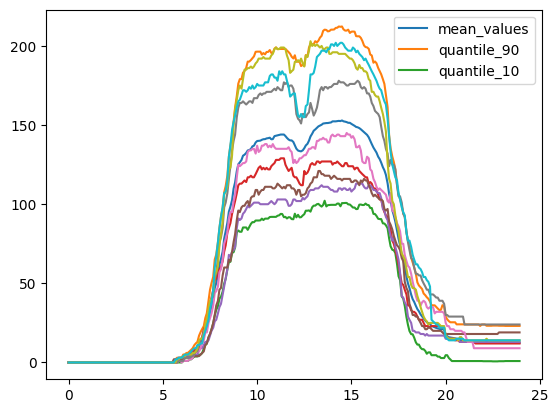

In [31]:
weekday='Monday'
mean_values = df[df['weekday'].isin([weekday])].groupby('time_numeric')['num_people_inside'].aggregate([np.mean])
#quantile_90 = df[df['weekday'].isin([weekday])].groupby('time_numeric')['num_people_inside'].aggregate(np.percentile,q=90)
#quantile_10 = df[df['weekday'].isin([weekday])].groupby('time_numeric')['num_people_inside'].aggregate(np.percentile,q=10)
plt.plot(mean_values)
#plt.plot(quantile_90)
#plt.plot(quantile_10)
plt.legend(['mean_values'])
samples=list(df[df['weekday'].isin(['Monday'])]['date'].sample(n=7,random_state=42))
for sample in samples:
    df_to_plot=df[(df['weekday'].isin([weekday]))&(df['date']==sample)][['time_numeric','num_people_inside']].set_index('time_numeric')
    plt.plot(df_to_plot)





In [28]:
samples

[datetime.date(2022, 7, 18), 'mean_values', 'quantile_90', 'quantile_10']

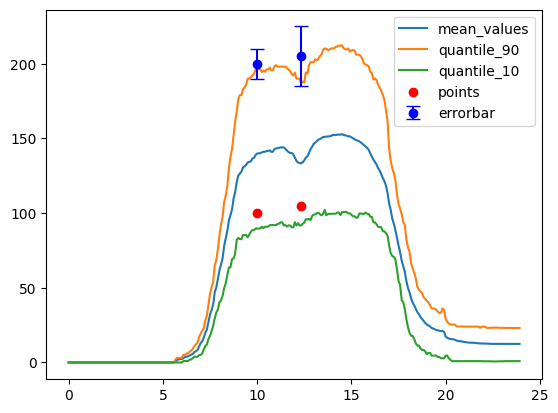

In [41]:
import matplotlib.pyplot as plt

plt.plot(mean_values)
plt.plot(quantile_90)
plt.plot(quantile_10)
plt.plot([10,12.33],[100,105],'ro')
plt.errorbar([10,12.33],[200,205],yerr=[10,20], capsize=5.0, fmt= 'bo' )
plt.legend(['mean_values', 'quantile_90', 'quantile_10', 'points', 'errorbar'])

In [ ]:
std_values

In [ ]:
mean_values

In [ ]:
type(mean_values['mean'])